## **Big Basket Product Analysis:-**

### **About Big Basket 🧺**
BigBasket is India's largest online grocery and food delivery platform, revolutionizing how consumers shop for daily essentials. Founded in 2011, BigBasket has become a household name, offering over 40,000 products across various categories including fresh fruits and vegetables, groceries, personal care, household items, and more. The platform serves millions of customers across major Indian cities, providing convenient doorstep delivery and competitive pricing.

### **Project Overview**
This data science project analyzes BigBasket's product dataset to uncover valuable insights about product performance, pricing strategies, customer preferences, and market trends. The analysis focuses on understanding product ratings, price distributions, brand performance, and identifying patterns that could inform business decisions.

### **Dataset Overview:**

Size: 27,555 products

Features: Product details, categories, brands, pricing, ratings, and descriptions

Objective: Extract actionable insights for business strategy and customer understanding



### **Step 1: Import Libraries and load dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/BigBasket Products.csv")

### **Step 2: Use head function to look for first 12 rows.**

In [ ]:
df.head(12)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


### **Step 3: Get Description of the data in the DataFrame**

In [ ]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


**Key Statistical Insights:**

* Average Sale Price: ₹334.65 with high variation (std: ₹1,202)
* Price Range: Products range from ₹2.45 to ₹112,475 (luxury/bulk items)
* Rating Distribution: Average rating of 3.94/5 indicates generally satisfied customers
* Market vs Sale Price: Market prices average ₹382, suggesting regular discounting
* Missing Ratings: Only 68% of products have ratings, indicating newer products or low engagement

### **Step 4: Find Information about the DataFrame**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


### **Step 5: Find out Top and least sold products**

In [ ]:
# Finding on the basis of rating:-
# Higher rating indicates higher popularity = Possibly Top product
# Lower rating indicates lower popularity = Possibly Least Liked product

top_rated = df.groupby('product')['rating'].mean().sort_values(ascending=False).head(5)

print("As Per Ratings: ")
print()
print("Top Sold Products:\n", top_rated)


As Per Ratings: 

Top Sold Products:
 product
Borosilicate Tempered Glass Mixing Bowl               5.0
Borosilicate Tempered Glass Cook N Serve Oval Dish    5.0
Bottle - Pet, Green, Solar                            5.0
Traditional Pure Iron Flat Bottom Kadai - 8 Inch      5.0
Peri Peri Stir-Fry Sauce                              5.0
Name: rating, dtype: float64


In [ ]:
least_rated = df.groupby('product')['rating'].mean().sort_values().head(5)
print("Least Sold Products:", least_rated)

Least Sold Products: product
Scuderia Light Essence Eau De Toilette               1.0
Divine-Issme Set - Eau De Parfum + Deodorant         1.0
Diwali Gift - Cane Delight, Large                    1.0
Mineral Based Baby Sunscreen Lotion, SPF 50 PA+++    1.0
Acnoklin-Rs Gel Face Wash                            1.0
Name: rating, dtype: float64


 **Product Performance Insights:**

**Top Performers (5.0 rating):**

* Kitchen items dominate (Borosilicate glass products, Iron Kadai)
* Focus on durability and functionality
* Premium positioning with perfect ratings

**Poor Performers (1.0 rating):**

* Personal care items (perfumes, cosmetics)
* Possible quality issues or unmet expectations
* Opportunity for product improvement or removal

**Business Implications:**

* Kitchen/cookware category shows strong customer satisfaction
* Personal care category needs quality review
* Perfect ratings might indicate limited review sample size

### **Step 6: Measuring discount on a certain item.**

In [ ]:
df['discount'] = df['market_price'] - df['sale_price']
df[['product', 'market_price', 'sale_price', 'discount']]

,product,market_price,sale_price,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,220.0,220.00,0.00
1,Water Bottle - Orange,180.0,180.00,0.00
2,"Brass Angle Deep - Plain, No.2",250.0,119.00,131.00
3,Cereal Flip Lid Container/Storage Jar - Assort...,176.0,149.00,27.00
4,Creme Soft Soap - For Hands & Body,162.0,162.00,0.00
...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic",249.0,199.20,49.80
27551,Rosemary,75.0,67.50,7.50
27552,Peri-Peri Sweet Potato Chips,200.0,200.00,0.00
27553,Green Tea - Pure Original,495.0,396.00,99.00


### **Step 7: Find out the Missing Values from the Dataset.**

In [ ]:
df.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,6
market_price,0
type,0
rating,8636
description,115


### **Step 8: Find out the outliers from the dataset according to the columns and fill them with mean**

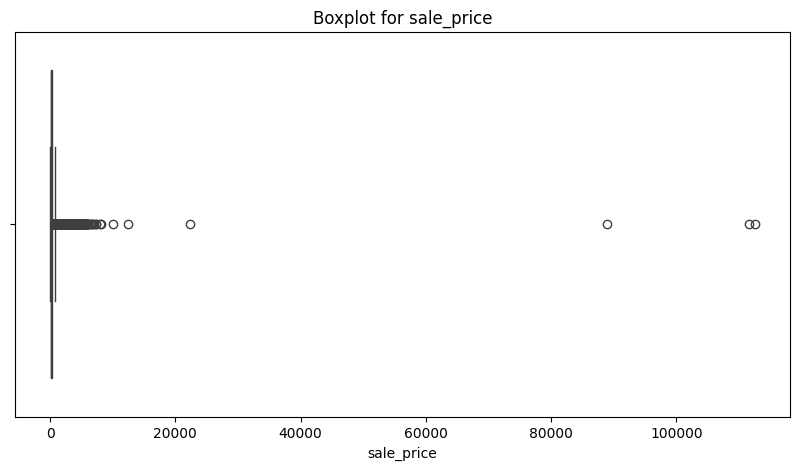

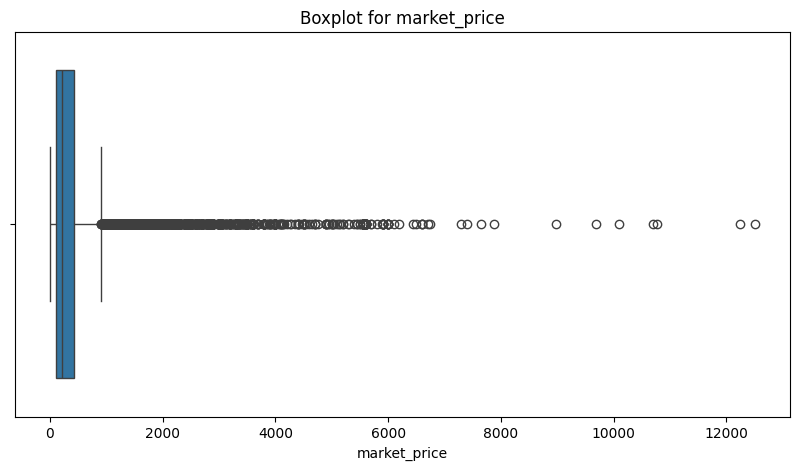

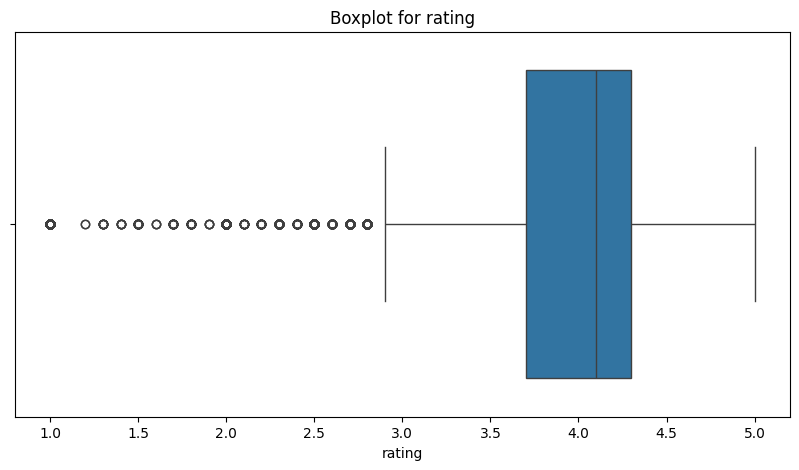

In [ ]:
cols = ['sale_price', 'market_price', 'rating']
for col in cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

**INSIGHTS:**
* Extreme price variations (luxury items, bulk purchases)
* Some products with unusually high/low ratings
* Price outliers could skew analysis

FIXING OUTLIERS:

In [ ]:
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean = df[col].mean()
    df[col]=np.where((df[col]<lower_bound) | (df[col]>upper_bound),mean,df[col])

CHECK FOR OUTLIERS AGAIN:

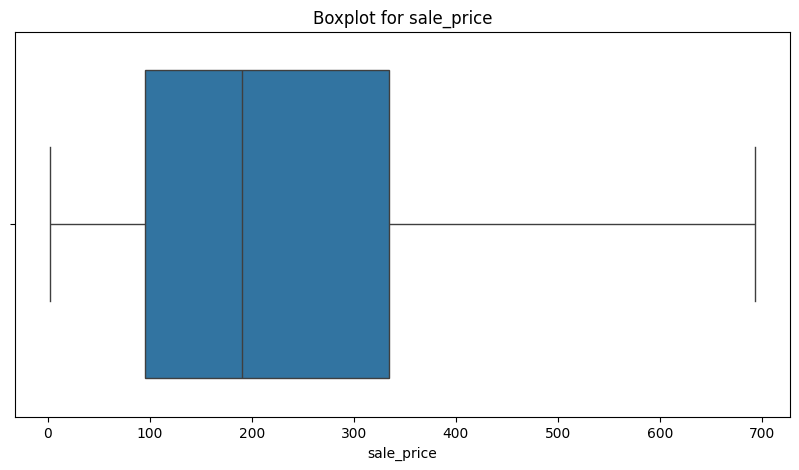

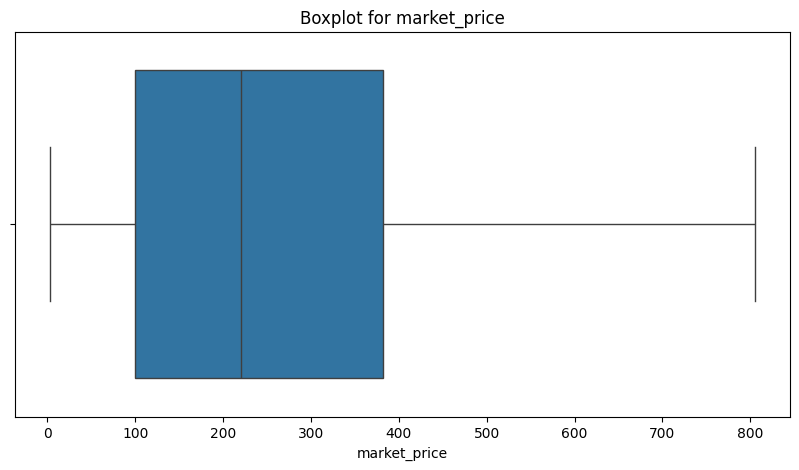

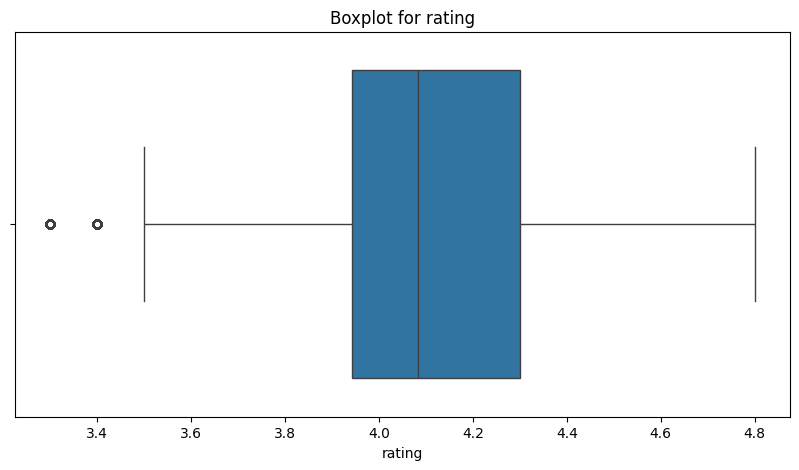

In [ ]:
cols = ['sale_price', 'market_price', 'rating']
for col in cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')

### **Step 9: Create Plots or visualizations.**

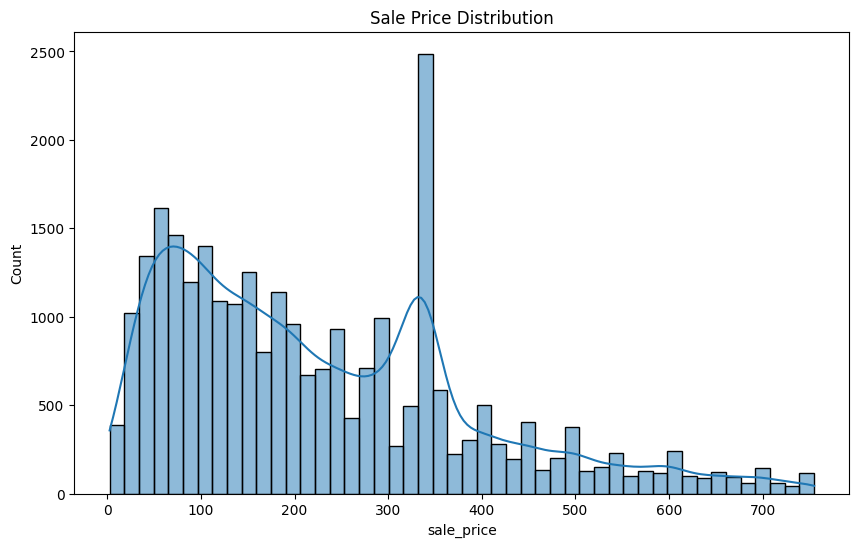

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['sale_price'], kde=True)
plt.title("Sale Price Distribution")
plt.show()

**Insights:**

* Right-skewed distribution: Most products are budget-friendly (₹50-300)
* Peak around ₹100-200: Sweet spot for customer purchasing power
* Business Strategy: Focus on affordable product range aligns with Indian market demand
* Market Penetration: Accessible pricing enables broader customer base

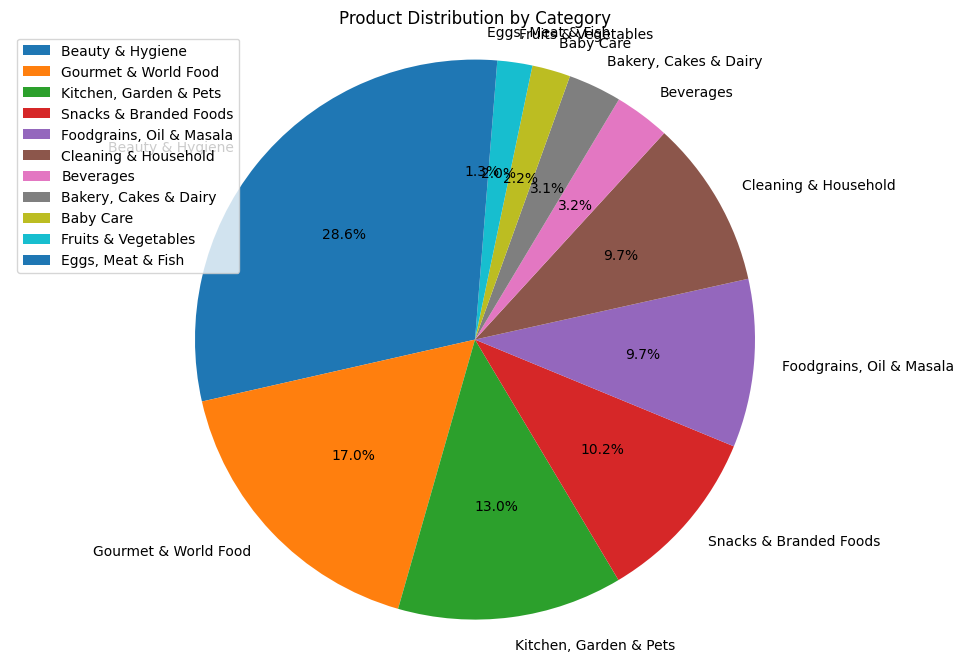

In [ ]:
plt.figure(figsize=(12,8))
category_counts = df['category'].value_counts()
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.legend(category_counts.index, loc='best')
plt.title("Product Distribution by Category")
plt.xticks(rotation=90)
plt.axis('equal')
plt.show()

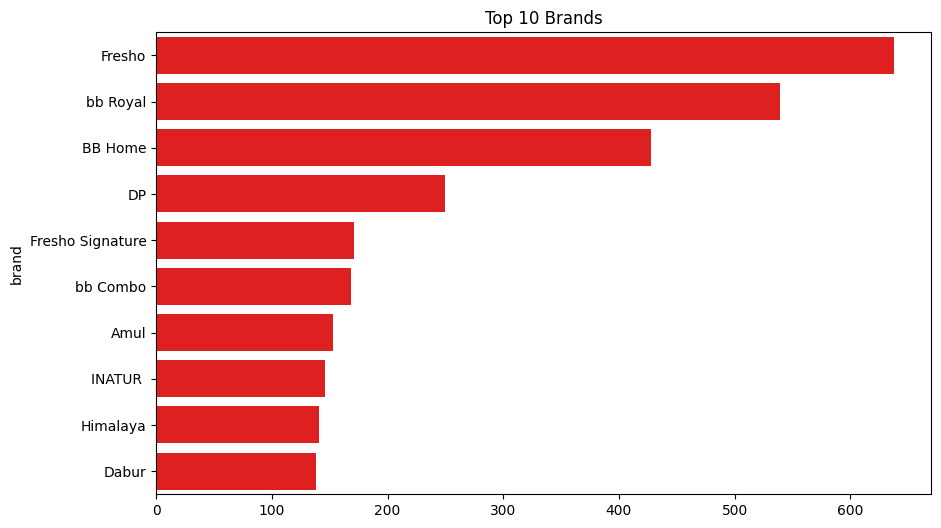

In [ ]:
plt.figure(figsize=(10,6))
top_brands = df['brand'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index,color="red")
plt.title("Top 10 Brands")
plt.show()

**Insights:**

* Brands like Fresho, bb Royal, BB Home, Fresho Signature, and bb Combo are BigBasket’s private labels, making up 50% of the top 10.


* Fresho tops the chart, likely due to its fresh produce, dairy, and bakery categories, which see frequent purchases and varied listings.

* Brands like Amul and Himalaya represent dairy and personal care, while INATUR and Dabur reflect the inclusion of Ayurvedic and wellness products.

* While national brands (e.g., Amul, Dabur) are trusted staples, in-house brands offer broader listings, possibly due to multiple package sizes and variants.

* The presence of multiple BigBasket brands suggests growing customer confidence in private labels, a common trend in modern e-commerce.

Text(0.5, 1.0, 'Correlation Heatmap')

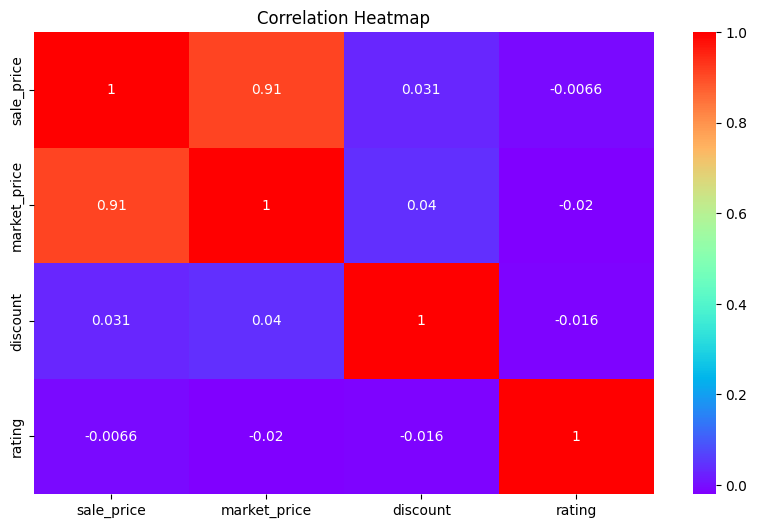

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['sale_price', 'market_price', 'discount', 'rating']].corr(), annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')

**Correlation Insights:**

* Strong Price Correlation (0.91): Market and sale prices move together
* Weak Rating-Price Correlation: Price doesn't strongly predict satisfaction
* Discount-Price Relationship: Minimal correlation suggests strategic discounting
* Customer Behavior: Ratings independent of price indicate value-focused shopping



### **Conclusion💡:**
This analysis of BigBasket's product dataset reveals a well-structured e-commerce platform with strategic pricing, diverse product portfolio, and strong customer engagement in key categories. The company demonstrates sophisticated understanding of customer preferences through its product mix and pricing strategies.



**Key Success Factors🏆:**

* Strong performance in essential categories (kitchen, household)
* Flexible pricing model that balances market competition with profitability
* Diverse brand portfolio catering to different customer segments

**Areas for Improvement📢:**

* Personal care product quality and customer satisfaction
* Customer engagement and rating collection
* Premium product positioning and marketing

### **Final Remarks🎯:**

The analysis demonstrates BigBasket's strong market position while highlighting specific areas where data-driven decisions can drive **further growth and customer satisfaction.**